# SciPy - Librería de algorítmos científicos para Python

Versión original en inglés de J.R. Johansson (robert@riken.jp) http://dml.riken.jp/~rob/

Traducido/Adaptado por [G.F. Rubilar](http://google.com/+GuillermoRubilar) y Stefan Vogt.

La última versión de estos [notebooks de IPython](http://ipython.org/notebook.html) está disponible en [http://github.com/gfrubi/clases-python-cientifico](http://github.com/gfrubi/clases-python-cientifico).

La última versión del original (en inglés) de estos [notebooks de IPython](http://ipython.org/notebook.html) está disponible en [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures).

Los otros notebooks de esta serie están listados en [http://jrjohansson.github.com](http://jrjohansson.github.com).

In [1]:
# ¿qué hace esta línea?. La respuesta en la clase 4
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Introducción

El paquete SciPy agrega características a los algorítmos de bajo nivel de NumPy para arreglos multidimensionales, y provee un gran número de algorítmos de alto nivel de uso científico. Algunos de los tópicos que cubre SciPy son:

* Funciones especiales ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integración ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimización ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolación ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Transformada de Fourier ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Procesamiento de señales ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Álgebra lineal ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Problemas de Eigenvalores de matrices dispersas ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Estadística ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Procesamiento de imágenes multi-dimensional ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* Entrada/Salida desde/hacia archivos ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))

Cada uno de estos submódulos provee un muchas funciones y clases que pueden ser usadas para resolver problemas en sus respectivos tópicos.

En esta clases veremos cómo usar algunos de estos subpaquetes.

Para acceder al paquete SciPy en un programa Python, comenzamos importando todo desde el módulo `scipy`.

In [2]:
import scipy as sp

Si sólo necesitamos usar una parte de las rutinas de SciPy podemos incluir selectivamente sólo aquellos módulos en los que estamos interesados. Por ejemplo, para incluir el paquete de álgebra lineal bajo el nombre `la`, podemos incluir:

In [3]:
import scipy.linalg as la

## Funciones Especiales

En muchos problemas de física y química computacional son importantes varias funciones matemáticas especiales. SciPy provee implementaciones de muchas de estas funciones especiales. Para más detalles, ver la lista de funciones en la documentación http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special. 

Para demostrar el uso típico de estas funciones especiales nos concentraremos en la función de Bessel de primera especie:

$J_\alpha(x) = \sum_{m=0}^\infty \frac{(-1)^m}{m! \, \Gamma(m+\alpha+1)} {\left(\frac{x}{2}\right)}^{2m+\alpha}$

y de segunda especie:

$J_\alpha(x) = \sum_{m=0}^\infty \frac{(-1)^m}{m! \, \Gamma(m+\alpha+1)} {\left(\frac{x}{2}\right)}^{2m+\alpha}$


In [4]:
from scipy.special import jn, yn, jn_zeros, yn_zeros

In [5]:
n = 0    # orden de la función
x = 0.0

# Función de Bessel de primera especie
print("J_%d(%f) = %f" % (n, x, jn(n, x)))

x = 1.0
# Función de Bessel de segunda especie
print("Y_%d(%f) = %f" % (n, x, yn(n, x)))



J_0(0.000000) = 1.000000
Y_0(1.000000) = 0.088257


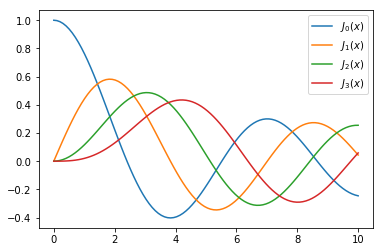

In [6]:
# El módulo scipy.special incluye muchas funciones de Bessel 
# Aquí usaremos las funciones jn e yn, que son las funciones de Bessel 
# de primera y segunda especie, y de orden real. Incluimos también las  
# funciones jn_zeros e yn_zeros que entregan los ceros de las
# funciones jn e yn.
#

x = np.linspace(0, 10, 100)

for n in range(4):
    plt.plot(x, jn(n, x), label=r"$J_%d(x)$" % n);
plt.legend();


## Integración

### Integración numérica: cuadraturas

La evaluación numérica de una función, del tipo

$\displaystyle \int_a^b f(x) dx$

es llamada *cuadratura numérica*, o simplemente *cuadratura*. SciPy suministra funciones para diferentes tipos de cuadraturas, por ejemplo las funciones `quad`, `dblquad` y `tplquad` para calcular integrales simples, dobles o triples, respectivamente.

In [7]:
from scipy.integrate import quad, dblquad, tplquad

Las función `quad` acepta una gran cantidad de argumentos opcionales, que pueden ser usados para ajustar detalles del comportamiento de la función (ingrese `help(quad)` para más detalles).

El uso básico es el siguiente:

In [8]:
# define una función simple para ser integrada
def f(x):
    return x**2

In [9]:
x_inf = 0 # el límite inferior de x
x_sup = 2 # el límite superior de x

val, errabs = quad(f, x_inf, x_sup)

print("valor de la integral =", val, ", error absoluto =", errabs)

valor de la integral = 2.666666666666667 , error absoluto = 2.960594732333751e-14


Si necesitamos incluir argumento extras en la función integrando podemos usar el argumento `args`:

In [10]:
# ceros de la funcion de Bessel 
n = 3 # order
m = 2 # numero de raizes a calcular
jn_zeros(n, m)

array([ 6.3801619 ,  9.76102313])

In [17]:
def integrando(x, n):
    """
    función de Bessel de primera especie y orden n. 
    """
    return jn(n, x)


x_inf = 0 # el límite inferior de x
x_sup = 6.38 # el límite superior de x

val, errabs = quad(integrando, x_inf, x_sup, args=(3,)) # evalua la integral con n=3

print(val, errabs)

1.356892674608161 1.5064534892951908e-14


Para funciones simples podemos usar la función lambda function (función anónima) en lugar de definir explícitamente una función para el integrando:

In [17]:
val, errabs = quad(lambda x: np.exp(-x ** 2), -np.Inf, np.Inf) # Inf = infinito!

print("Resultado numérico  =", val, errabs)

analitico = np.sqrt(np.pi)
print("Resultado analitico =", analitico)

Resultado numérico  = 1.7724538509055159 1.4202636780944923e-08
Resultado analitico = 1.77245385091


Como se muestra en este ejemplo, podemos usar 'Inf' y '-Inf' como límites de la integral.

Integrales de dimensión mayor se evalúan de forma similar:

In [19]:
def integrando(x, y):
    return np.exp(-x**2-y**2)

x_inf = 0  
x_sup = 10
y_inf = 0
y_sup = 10

val, errabs = dblquad(integrando, x_inf, x_sup, lambda x : y_inf, lambda x: y_sup)

print(val, errabs)

0.7853981633974476 1.3753098510218528e-08


Note como requerimos incorporar funciones lambda para los límites de la integración en y, ya que estos límites pueden en general ser funciones de x.

## Álgebra lineal

El módulo de álgebra lineal contiene muchas funciones relacionadas con matrices, incluyendo resolución de ecuaciones lineales, cálculo de valores propios, funciones de matrices (por ejemplo, para exponenciación matricial), varias decomposiciones diferentes (SVD, LU, cholesky), etc. 

Una documentación detallada está disponible aquí: http://docs.scipy.org/doc/scipy/reference/linalg.html

Veremos cómo usar algunas de estas funciones:

#### Sistemas de ecuaciones lineales

Los sistemas de ecuaciones lineales de la forma

$A x = b$

donde $A$ es una matriz y $x,b$ son vectores, pueden ser resueltos del modo siguiente:

In [26]:
from scipy import linalg

A = np.array([[1,2,3], [4,12,6], [7,8,9]])
b = np.array([4,2,10])

In [37]:
x = linalg.solve(A, b)

[-0.14285714 -0.71428571  1.85714286]


In [39]:
# verificamos la solución
np.dot(A, x) - b


array([ -4.44089210e-16,   0.00000000e+00,   0.00000000e+00])

Podemos también hacer lo mismo con

$A X = B$,

donde ahora $A, B$ y $X$ son matrices:

In [45]:
A = np.random.rand(3,3)
B = np.random.rand(3,3)

In [46]:
X = linalg.solve(A, B)

In [47]:
X

array([[ 1.01878928, -1.23811348, -2.6793536 ],
       [ 0.68728135,  0.33129747,  0.74110308],
       [-1.17633337,  1.61837448,  2.17046236]])

In [48]:
# verificamos la solución
np.dot(A, X) - B

array([[  0.00000000e+00,   5.55111512e-17,   5.55111512e-17],
       [  0.00000000e+00,   1.11022302e-16,   1.66533454e-16],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

#### Valores y vectores propios

El problema de valores propios para la matriz $A$:

$\displaystyle A v_n = \lambda_n v_n$,

donde $v_n$ es el $n$-ésimo vector propio y $\lambda_n$ es el $n$-ésimo valor propio.

Para calcular los vectores propios de una matriz usamos `eigvals` y para calcular tanto los valores como los vectores propios, podemos usar la función `eig`:

In [49]:
evals = linalg.eigvals(A)

In [60]:
evals[0]

(1.9732492252935121+0j)

In [51]:
evals, evecs = linalg.eig(A)

In [52]:
evals

array([ 1.97324923+0.j,  0.15876810+0.j, -0.46836758+0.j])

In [53]:
evecs

array([[-0.63333243, -0.73943313,  0.42519093],
       [-0.66940905, -0.05135329, -0.74481978],
       [-0.38830601,  0.67126857,  0.51425303]])

Los vectores propios correspondientes al $n$-ésimo valor propio (guardado en `evals[n]`) es la $n$-ésima *columna* en `evecs`, es decir, `evecs[:,n]`. Para verificar esto, intentemos multiplicar los vectores propios con la matriz y comparar el resultado con el producto del vector propio y el valor propio:

In [65]:
n = 1

np.dot(A, evecs[:,n]) - evals[n] * evecs[:,n]

array([  0.00000000e+00+0.j,   1.66533454e-16+0.j,   4.16333634e-17+0.j])

#### Operaciones matriciales

In [66]:
# matriz inversa
linalg.inv(A)

array([[  1.98276948,  -0.32380123,  -0.58980857],
       [ -3.44728311,  -3.82469741,  11.69948642],
       [ -2.30782765,   2.11666355,  -0.05205951]])

In [67]:
# determinante
linalg.det(A)

-0.0328994711255825

In [68]:
# norma de un matri
linalg.norm(A, ord=2), linalg.norm(A, ord=np.Inf)

(1.5076387810138232, 1.6386702868543361)

## Optimización

La optimización (encontrar el máximo o el mínimo de una funciónn) constituye un campo amplio en matemáticas, y la optimización de funciones complicadas o de muchas variables puede ser complicada. Aquí sólo revisaremos algunos casos muy simples. Para una introducción detallada a la optimización con SciPy, ver (en inglés): http://scipy-lectures.github.com/advanced/mathematical_optimization/index.html

Para usar el módulo de optimización de Scipy hay que importar el módulo `optimize`:

In [61]:
from scipy import optimize

### Encontrando mímimos

Veamos primero cómo encontrar el mínimo de una función simple de una variable:

In [62]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

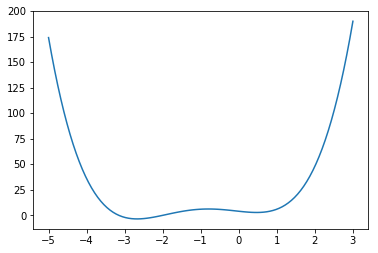

In [63]:
x = np.linspace(-5, 3, 100)
plt.plot(x, f(x));

Podemos usar la función `fmin_bfgs` para encontrar el mínimo de la función:

In [64]:
x_min = optimize.fmin_bfgs(f, -2) # busca un mínimo local cerca -2
x_min 

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 5
         Function evaluations: 24
         Gradient evaluations: 8


array([-2.67298151])

In [78]:
optimize.fmin_bfgs(f, 0.5)  # busca un mínimo local cerca 0.5

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 3
         Function evaluations: 15
         Gradient evaluations: 5


array([ 0.46961745])

Podemos también usar las funciones `brent` o `fminbound`. Estas funciones tienen una sintaxis algo distinta y usan algoritmos diferentes.

In [79]:
optimize.brent(f)

0.46961743402759754

In [80]:
optimize.fminbound(f, -4, 2)  # busca el mínimo en el intervalo (-4,2)

-2.6729822917513886

### Encontrando las raíces de una función

Para encontrar las soluciones a una ecuación de la forma $f(x) = 0$ podemos usar la función `fsolve`. Ella requiere especificar un punto inicial: 

In [65]:
omega_c = 3.0
def f(omega):
    return np.tan(2*np.pi*omega) - omega_c/omega

/home/stvogt/.anaconda/envs/curso_py/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


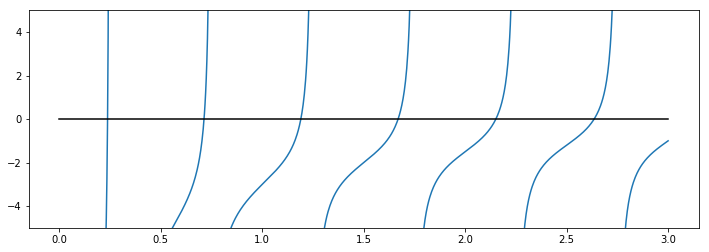

In [76]:
fig, ax  = plt.subplots(figsize=(12,4))
x = np.linspace(0, 3.0, 1000)
y = f(x)
mask = np.where(np.abs(y) > 50)
x[mask] = y[mask] = np.NaN # elimina líneas verticales cuando la función cambia de signo
ax.plot(x, y)
ax.plot([0, 3], [0, 0], 'k')
ax.set_ylim(-5,5);

In [83]:
optimize.fsolve(f, 0.1)

array([ 0.23743014])

In [84]:
optimize.fsolve(f, 0.6)

array([ 0.71286972])

In [85]:
optimize.fsolve(f, 1.1)

array([ 1.18990285])

## Interpolación

La interpolación es simple y conveniente en Scipy: La función `interp1d`, cuando se le suministran arreglos describiendo datos X e Y, retorna un objeto que se comporta como una función que puede ser llamada para un valor de x arbitrary (en el rango cubierto por X), y que retorna el correspondiente valor interpolado de y:

In [89]:
from scipy.interpolate import *

In [92]:
def f(x):
    return np.sin(x)

In [98]:
n = np.arange(0, 10)  
x = np.linspace(0, 9, 100)

y_meas = f(n) + 0.1 * np.random.randn(len(n)) # simula medidas con error
y_real = f(x)

linear_interpolation = interp1d(n, y_meas)
y_interp1 = linear_interpolation(x)

cubic_interpolation = interp1d(n, y_meas, kind='cubic')
y_interp2 = cubic_interpolation(x)

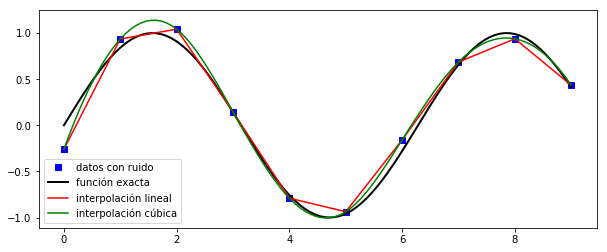

In [99]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(n, y_meas, 'bs', label='datos con ruido')
ax.plot(x, y_real, 'k', lw=2, label=u'función exacta')
ax.plot(x, y_interp1, 'r', label=u'interpolación lineal')
ax.plot(x, y_interp2, 'g', label=u'interpolación cúbica')
ax.legend(loc=3);

## Estadística

El módulo `scipy.stats` contiene varias distribuciones estadísticas, funciones estadísticas. Para una documentación completa de estas las características, ver (en inglés) [http://docs.scipy.org/doc/scipy/reference/stats.html](http://docs.scipy.org/doc/scipy/reference/stats.html).

También existe un paquete Python muy poderoso para modelamiento estadístoco llamado statsmodels. Ver [http://statsmodels.sourceforge.net](http://statsmodels.sourceforge.net) para más detalles.

In [78]:
from scipy import stats

crea una variable aleatoria (discreta) con distribución poissoniana

$P(k) = \frac{\mu^k e^{\mu}}{k!}$


In [79]:

X = stats.poisson(3.5) # mu = 2.5  (goles promedio en un mundial)
X.pmf(1)  # Probabilidad de 0 goles en un partido del mundial.


0.10569084197811476

(array([  26.,   94.,  184.,  201.,  186.,  149.,   87.,   36.,   26.,   11.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 10 Patch objects>)

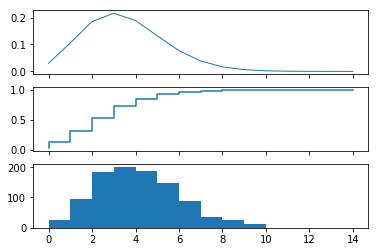

In [92]:
n = np.arange(0,15)

fig, axes = plt.subplots(3,1, sharex=True)

# grafica la "probability mass function" (PMF)
axes[0].plot(n, X.pmf(n),lw=1,linestyle="-")
# grafica la "commulative distribution function" (CDF)
axes[1].step(n, X.cdf(n))

# grafica histograma de 1000 realizaciones de la variable estocástica X rvs: random variate sample
axes[2].hist(X.rvs(size=1000))

In [110]:
# crea una variable aleatoria (contínua) con distribución normal
Y = stats.norm(loc=1.0)

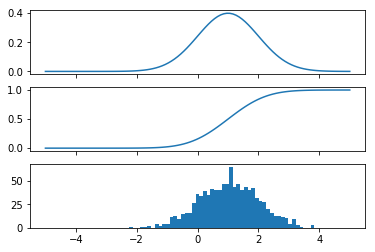

In [111]:
x = np.linspace(-5,5,100)

fig, axes = plt.subplots(3,1, sharex=True)

# grafica la función distribución de probabilidad ("probability distribution function", PDF)
axes[0].plot(x, Y.pdf(x))

# grafica función de distribución acumulada ("commulative distributin function", CDF)
axes[1].plot(x, Y.cdf(x));

# grafica histograma de 1000 realizaciones aleatorias de la variable estocástica Y
axes[2].hist(Y.rvs(size=1000), bins=50);

Estadística:

In [112]:
X.mean(), X.std(), X.var() # distribución de Poission

(2.5, 1.5811388300841898, 2.5)

In [96]:
Y.mean(), Y.std(), Y.var() # distribucuón normal

(1.0, 1.0, 1.0)

In [97]:
# Datos de diametro en km de cometas apocalipticos que han impactado la tierra en su historia

data = [7.40, 6.90, 5.20, 6.20, 4.20, 8.10, 9.50, 7.40, 6.80, 7.50, 7.80, 6.60, 6.00, 8.60, 8.0, 7.20, 7.30, 9.00, 9.11, 9.20, 8.20, 10.01, 11.3]


In [98]:
mean, sigma = stats.norm.fit(data)
print(mean)
print(sigma)

7.71826086957
1.55628501965


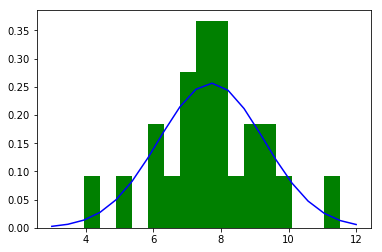

In [100]:
x = np.linspace(3,12,20)

D = stats.norm(loc=mean, scale = sigma)
plt.hist(data,x,color="g", normed=True)
plt.plot(x,D.pdf(x),color='b');


In [121]:
D.mean(), D.std(), D.var()

(7.7182608695652162, 1.556285019648346, 2.4220230623818528)

In [122]:
prob_over_10 = 1 - D.cdf(x= 10) 

In [123]:
print(prob_over_10  )

0.0713044266215


## Regresiónes lineales

Regresiones lineales son un métdod científico simple, que permite  predecir
una relación continua y lineal entre dos variables. En el ejemplo a continuación se quiere 
obtener la masa molecular de una gas a partir de datos reales de presión y densidad del gas. 
La masa molecular del gas se puede calcular simplemente a partir de la ecuación de los gases ideales como:

\begin{equation}
\mu = \frac{\rho RT}{P}
\end{equation}

donde $\rho$ es la densidad del gas. En estricto rigor esta ecuación solamente es valida a P=0. Por 
eso que hay que utilizar una regresión lineal para extrapolar los datos a P=0.

Considermos los siguientes presiones de gas en kPa: 

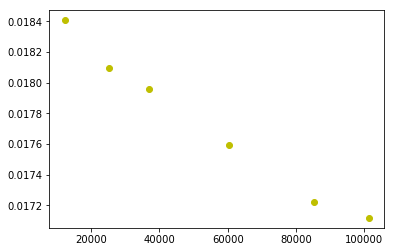

In [114]:
P = [12.223,25.20,36.97,60.37,85.23,101.3]
P = [float(x)*1000 for x in P] # en Pa⋅⋅
rho = [0.225, 0.456, 0.664, 1.062, 1.468, 1.734]
rho = [float(x)*1000 for x in rho ] # en g/m^3
P_d = []

for i in range(len(P)):
    P_d.append(float(rho[i])/float(P[i]))

plt.plot(P,P_d, 'yo')



In [115]:
# Usando numpy
fit = np.polyfit(P,P_d,1)
print(fit)
# Usando scipy
fit_scipy = stats.linregress(P,P_d)
print(fit_scipy)
slope, intercept, r_value, p_value, std_err = stats.linregress(P,P_d)



[ -1.44547568e-08   1.85068087e-02]
LinregressResult(slope=-1.445475684633581e-08, intercept=0.01850680871471868, rvalue=-0.99285860546953164, pvalue=7.6317169927967688e-05, stderr=8.6840666289507033e-10)


/home/stvogt/.anaconda/envs/curso_py/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 'Pressure' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/home/stvogt/.anaconda/envs/curso_py/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 'y = -0.0x +0.0185   R = -0.9929' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


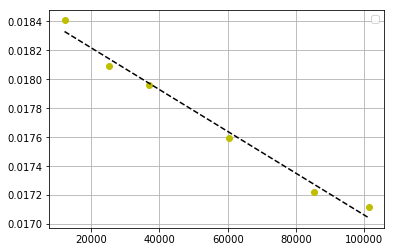

La masa molar es: 45.8750309221 g/mol


In [116]:
fit_fn = np.poly1d(fit)
plt.plot(P,P_d, 'yo', P, fit_fn(P), '--k')
#plt.legend("y = "+str(slope)+"x +"+str(intercept))
R = str(round(r_value,4))
m = str(round(slope,4))
t = str(round(intercept,4))
plt.legend(('Pressure', "y = "+m+"x +"+t+"   R = "+R), 'upper left')
plt.autoscale(True)
plt.grid(True)
plt.show()

R = 8.314
T = 298.15

Mu = R*T*intercept

print("La masa molar es: "+str(Mu)+ " g/mol")


### Ecuaciones diferenencias ordinarias (EDOs)

SciPy provee dos formas diferentes para resolver EDOs: Una API (Interfaz de programación de aplicaciones, del inglés "Application programming interface") basada en la función `odeint`, y una API orientada al objeto basada en la clases `ode`. Usualmentey `odeint` es más simplea de usar, pero la clase `ode` ofrece niveles de control más finos.

Aquí usaremos las funciones `odeint`. Para mayor información sobre las clases `ode`, use `help(ode)`. Hace casi todo lo que hace `odeint`, pero de una forma más orientada al objeto.

Para usar `odeint`, primero importelo desde el módulo `scipy.integrate`:

In [117]:
from scipy.integrate import odeint, ode

Un sistema de EDOs es usualmente formulado en forma estándar antes de ser resuelto numéricamente. La forma estánder es:

$y' = f(y, t)$

donde 

$y = [y_1(t), y_2(t), ..., y_n(t)]$ 

y $f$ es una función que determina las derivadas de la función $y_i(t)$. Para resolver la EDO necesitamos conocer la función $f$ y una condición inicial, $y(0)$.

Note que EDOs de orden superior siempre pueden ser escritas en esta forma introduciendo nuevas variables para las derivadas intermedias.

Una vez definida la función `f` y el arreglo `y_0`, podemos usar la función `odeint`:

    y_t = odeint(f, y_0, t)

donde `t` es un arreglo con las coordenadas temporales para las que se resolverá el sistema de EDOs. El resultado `y_t` es un arreglo con una linea para cada punto de tiempo `t`, y donde cada columna corresponde a una solución `y_i(t)` para ese tiempo. 

Veremos cómo implementar `f` e `y_0` en código Python en los siguientes ejemplos.

#### Ejemplo: Oscilador armónico amortiguado

Problemas de EDO son importantes en Física Computacional, de modo que veremos un ejemplo adicional: el oscilador armónico amortiguado. Este problema está bastante bien descrito en wikipedia (en inglés): http://en.wikipedia.org/wiki/Damping.

La ecuación de movimiento para el oscilador amortiguado es:

$\displaystyle \frac{\mathrm{d}^2x}{\mathrm{d}t^2} + 2\zeta\omega_0\frac{\mathrm{d}x}{\mathrm{d}t} + \omega^2_0 x = 0$

donde $x$ es la posición del oscilador, $\omega_0$ la frecuencia, y $\zeta$ es el factor de amortiguamiento. Para escribir esta EDO de segundo orden en la forma estándar, introducimos $p = \frac{\mathrm{d}x}{\mathrm{d}t}$:

$\displaystyle \frac{\mathrm{d}p}{\mathrm{d}t} = - 2\zeta\omega_0 p - \omega^2_0 x$

$\displaystyle \frac{\mathrm{d}x}{\mathrm{d}t} = p$

En la implementación de este ejemplo agregaremos algunos argumentos extras a la función del lado derecho de la EDO, en lugar de usar variables globales como en el ejemplo anterior. Como consecuencia de los argumentos extra, necesitamos pasar un argumento clave `args` a la función `odeint`:

In [ ]:
def dy(y, t, zeta, w0):
    """
    El lado derecho de la EDO del oscilador amortiguado
    """
    x, p = y[0], y[1]
    
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return [dx, dp]

In [ ]:
# condición inicial: 
y0 = [1.0, 0.0]

In [ ]:
# tiempos en los que se resolvera la EDO
t = np.linspace(0, 10, 1000)
w0 = 2*np.pi*1.0

In [ ]:
# resuelve el sistema de EDOs para tres valores diferentes del factor de amortiguamiento

y1 = odeint(dy, y0, t, args=(0.0, w0)) # no amortiguado
y2 = odeint(dy, y0, t, args=(0.2, w0)) # subamortiguado
y3 = odeint(dy, y0, t, args=(1.0, w0)) # amortiguado crítico
y4 = odeint(dy, y0, t, args=(5.0, w0)) # sobreamortiguado


In [ ]:
fig, ax = plt.subplots()
ax.plot(t, y1[:,0], 'k', label="no amortiguado", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="subamortiguado")
ax.plot(t, y3[:,0], 'b', label=u"amortiguado crítico")
ax.plot(t, y4[:,0], 'g', label="sobreamortiguado")
ax.legend();

In [ ]:
## Lectura adicional

* http://www.scipy.org - La página oficial del proyecto SciPy.
* http://docs.scipy.org/doc/scipy/reference/tutorial/index.html - Un tutorial sobre cómo comenzar a usar SciPy. 
* https://github.com/scipy/scipy/ - El códifo fuente de SciPy. 
